In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv("D:/ml/archive/multiple_linear_regression_dataset.csv")
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [19]:
X_train,X_test,y_train,y_test=train_test_split(df[['age','experience']],df['income'],test_size=0.2)
model=LinearRegression()

In [21]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("MSE is",mean_squared_error(y_test,y_pred))
print("MAE is",mean_absolute_error(y_test,y_pred))
print("r-squared error is",r2_score(y_test,y_pred))

MSE is 3114084.943397499
MAE is 1375.136985108542
r-squared error is 0.9576828069652961


C:\Users\prane\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


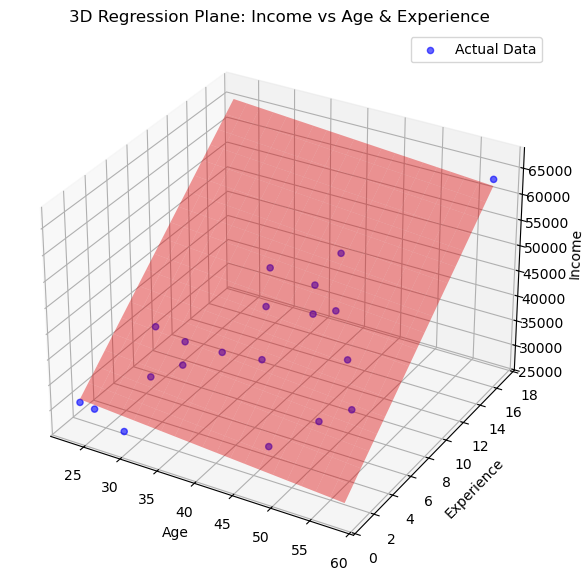

In [30]:
# Create a meshgrid of age and experience
age_range = np.linspace(df['age'].min(), df['age'].max(), 20)
exp_range = np.linspace(df['experience'].min(), df['experience'].max(), 20)
age_grid, exp_grid = np.meshgrid(age_range, exp_range)

# Predict income for the grid
income_pred = model.predict(np.c_[age_grid.ravel(), exp_grid.ravel()])
income_pred = income_pred.reshape(age_grid.shape)

# 3D Visualization
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data
ax.scatter(df['age'], df['experience'], df['income'], color='blue', alpha=0.6, label='Actual Data')

# Plot regression surface
ax.plot_surface(age_grid, exp_grid, income_pred, color='red', alpha=0.4)

ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.set_title('3D Regression Plane: Income vs Age & Experience')
ax.legend()

plt.show()
